In [13]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

sns.set(style="whitegrid")

In [14]:
import os
print(os.getcwd())


c:\Users\Hanan\Downloads\KIFIYA Week 1\Predicting-Price-Moves-with-News-Sentiment---Final-Submission\notebooks


In [16]:
print(os.listdir("data"))  # if 'data' is in the same folder as notebook


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

In [17]:
# Cell 2: Load Dataset
df = pd.read_csv("../data/raw_analyst_ratings.csv")
  # Replace with actual path
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
# Cell 3: Basic Stats
print("Total articles:", len(df))
print("Null values:\n", df.isnull().sum())
df.info()

Total articles: 1407328
Null values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


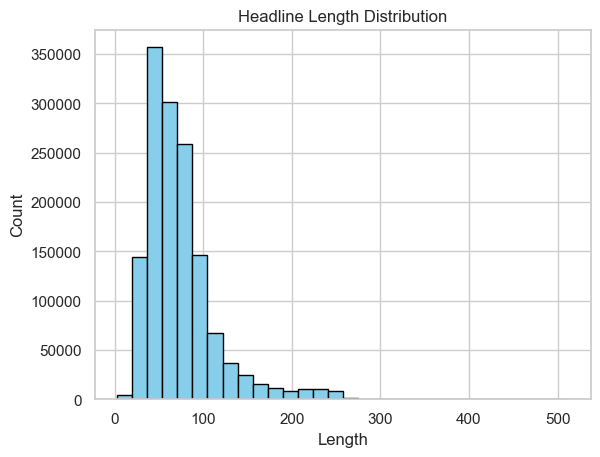

In [19]:

# Cell 4: Headline Length
df["headline_length"] = df["headline"].astype(str).apply(len)
plt.hist(df["headline_length"], bins=30, color="skyblue", edgecolor="black")
plt.title("Headline Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

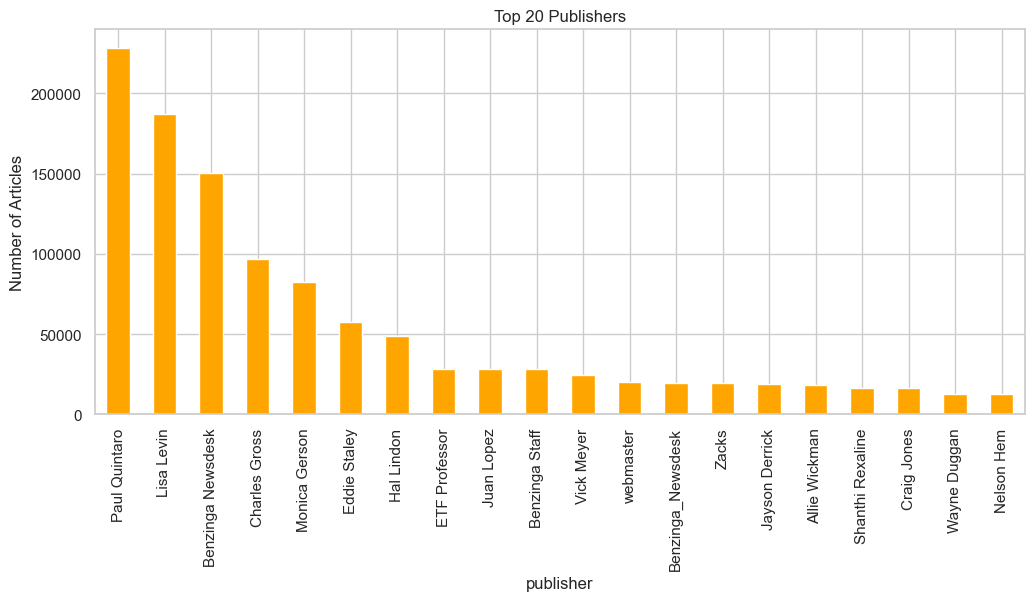

In [20]:
# Cell 5: Publisher Frequency
publisher_counts = df["publisher"].value_counts().head(20)
plt.figure(figsize=(12,5))
publisher_counts.plot(kind="bar", color="orange")
plt.title("Top 20 Publishers")
plt.ylabel("Number of Articles")
plt.show()

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')

In [21]:
# Cell 6: Publication Dates
df["date"] = pd.to_datetime(df["date"])
articles_per_day = df.groupby(df["date"].dt.date).size()
plt.figure(figsize=(12,4))
articles_per_day.plot()
plt.title("Articles Published per Day")
plt.ylabel("Number of Articles")
plt.show()


ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Cell 7: Keyword Analysis
keywords = ["earnings","approval","acquire","target","record","beats","misses"]
for kw in keywords:
    df[kw] = df["headline"].str.lower().str.contains(kw).astype(int)
print("Keyword counts:\n", df[keywords].sum())

In [ ]:
# Cell 8: Text Sentiment
def get_sentiment(text):
    if not isinstance(text, str) or len(text.strip())==0:
        return 0
    return TextBlob(text).sentiment.polarity

df["sentiment"] = df["headline"].apply(get_sentiment)
plt.figure(figsize=(10,5))
sns.histplot(df["sentiment"], bins=30, color="green")
plt.title("Headline Sentiment Distribution")
plt.show()